In [1]:
from fastcore.xtras import load_pickle
import pandas as pd 
import os 
from glob import glob
import matplotlib.pyplot as plt
from datetime import datetime

import sys
sys.path.append("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/")
from plotutils import *
plt.style.use("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/kevin.mplstyle")

FOLDER = 'out'

In [3]:
if not os.path.exists(FOLDER):
    raise FileExistsError('Cannot find folder {}'.format(FOLDER))

all_res = glob(f'{FOLDER}/*.pkl')
print('Pickles found in {}: {}'.format(FOLDER, len(all_res)))

Pickles found in out: 108


In [4]:

compiled_res_list = []
conf_mats = []

for results in all_res:
    res_full = load_pickle(results)
    res = res_full['results']
    summary = {
        'size': res_full['train_size'],
        #'representation': res_full['data_summary']['representation'],
        'target': res_full['data_summary']['target'],
        'accuracy': res['accuracy'],
        'f1_macro': res['f1_macro'],
        'f1_micro': res['f1_micro'],
        'kappa': res['kappa'],
        'num_epochs': res_full['config']['tune_settings']['num_train_epochs'],
        'lr': res_full['config']['tune_settings']['learning_rate'],
        'bins': len(set(res['all_y_true'])),
        'test_size': len(res['all_y_true'])
       
    }
    confusion_matrix = {
        'all_y_true':res['all_y_true'],
        'all_y_pred':res['all_y_pred']
    }
    conf_mats.append(confusion_matrix)
    compiled_res_list.append(summary)


In [5]:
compiled_res = pd.DataFrame(compiled_res_list)
grouped_res =compiled_res.groupby(['bins', 'num_epochs', 'target', 'size']).agg(['mean', 'sem'])


In [6]:
grouped_res

accuracy            f1_macro            \
                                        mean       sem      mean       sem   
bins num_epochs target        size                                           
2    15         Densities_bin 10    0.000000  0.000000  0.000000  0.000000   
                              50    0.713333  0.017638  0.707851  0.018642   
                              100   0.790000  0.022949  0.788204  0.023497   
                              300   0.806667  0.067659  0.804780  0.068705   
                E_coh_bin     10    0.000000  0.000000  0.000000  0.000000   
                              50    0.653333  0.006667  0.635535  0.013080   
                              100   0.706667  0.022311  0.702840  0.023424   
                              300   0.826667  0.037118  0.826410  0.037056   
                R_gyr_bin     10    0.000000  0.000000  0.000000  0.000000   
                              50    0.840000  0.011547  0.839375  0.012060   
                              100   0.826667  0.025647  0.783642  0.057055   
                              300   0.913333  0.006667  0.913320  0.006680   
                T_g_bin       10    0.000000  0.000000  0.000000  0.000000   
                              50    0.666667  0.056960  0.637082  0.071325   
                              100   0.810000  0.011255  0.809166  0.011369   
                              300   0.833333  0.024037  0.833052  0.023794   
     20         Densities_bin 10    0.000000  0.000000  0.000000  0.000000   
                              50    0.760000  0.061101  0.689579  0.130646   
                              100   0.773333  0.006667  0.690185  0.089374   
                              300   0.846667  0.017638  0.846579  0.017596   
                E_coh_bin     10    0.000000  0.000000  0.000000  0.000000   
                              50    0.680000  0.011547  0.672539  0.015895   
                              100   0.740000  0.061101  0.739253  0.061448   
                              300   0.820000  0.020000  0.728103  0.083227   
                R_gyr_bin     10    0.000000  0.000000  0.000000  0.000000   
                              50    0.720000  0.020000  0.704054  0.030331   
                              100   0.873333  0.017638  0.873170  0.017697   
                              300   0.946667  0.006667  0.946629  0.006653   
                T_g_bin       10    0.000000  0.000000  0.000000  0.000000   
                              50    0.740000  0.023094  0.656732  0.095320   
                              100   0.833333  0.029059  0.832335  0.029536   
                              300   0.826667  0.029059  0.826613  0.029086   

                                    f1_micro               kappa            \
                                        mean       sem      mean       sem   
bins num_epochs target        size                                           
2    15         Densities_bin 10    0.000000  0.000000  0.000000  0.000000   
                              50    0.713333  0.017638  0.426667  0.035277   
                              100   0.790000  0.022949  0.580000  0.045898   
                              300   0.806667  0.067659  0.613333  0.135319   
                E_coh_bin     10    0.000000  0.000000  0.000000  0.000000   
                              50    0.653333  0.006667  0.306667  0.013333   
                              100   0.706667  0.022311  0.413333  0.044622   
                              300   0.826667  0.037118  0.653333  0.074237   
                R_gyr_bin     10    0.000000  0.000000  0.000000  0.000000   
                              50    0.840000  0.011547  0.680000  0.023094   
                              100   0.826667  0.025647  0.654771  0.050789   
                              300   0.913333  0.006667  0.826667  0.013333   
                T_g_bin       10    0.000000  0.000000  0.000000  0.000000   
                              50    0.666667  0.056960  0

## Plot Learning Curve for property

/home/jorenvanherck/.local/lib/python3.10/site-packages/matplotlib/ticker.py:2954: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


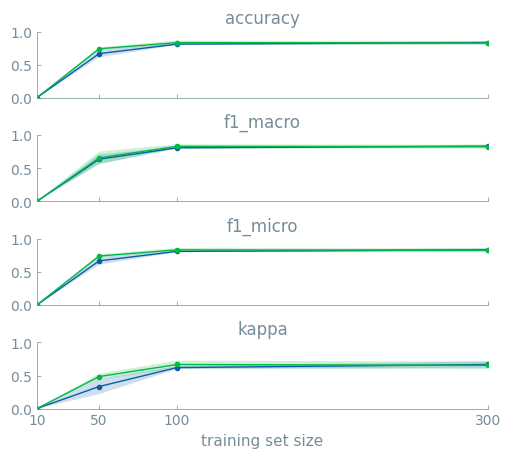

In [9]:
from scipy.constants import golden

ONE_COL_WIDTH_INCH = 5
TWO_COL_WIDTH_INCH = 7.2

ONE_COL_GOLDEN_RATIO_HEIGHT_INCH = ONE_COL_WIDTH_INCH / golden
TWO_COL_GOLDEN_RATIO_HEIGHT_INCH = TWO_COL_WIDTH_INCH / golden

BINS = 2
REPRESENTATION = 'T_g_bin'

fig, ax = plt.subplots(4, 1,figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH),constrained_layout = True , sharex=True)
 
for num_epochs in [15,20]:
    for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
        ax[i].plot(
            grouped_res.loc[BINS, num_epochs,REPRESENTATION].index, 
            grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['mean'],
            marker='o',
            label=f'{num_epochs} epochs'
        )
        ax[i].fill_between(
            grouped_res.loc[BINS, num_epochs,REPRESENTATION].index,
            grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['mean'] - grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['sem'],
            grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['mean'] + grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['sem'],
            alpha=0.2
        )
        ax[i].set_ylim(0,1)
        ax[i].set_title(metric)
        ax[i].set_xticks((list(compiled_res['size'].unique())))

ax[-1].set_xlabel('training set size')

now = datetime.now().strftime('%Y%m%d_%H%M')
fig.savefig(f'{now}-ben_monomer-{REPRESENTATION}-binary-{BINS}bin-classification-results.pdf', bbox_inches='tight')